In [11]:
import pandas as pd
import numpy as np
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
adhd_files = glob.glob("adhd/*.json")
nonadhd_files = glob.glob("nonadhd/*.json")

for file in adhd_files + nonadhd_files:
    with open(file, "r") as f:
        data = json.load(f)
    df = pd.json_normalize(data, record_path="trials")
    csv_path = file.replace(".json", ".csv")
    df.to_csv(csv_path, index=False)

adhd_csvs = glob.glob("adhd/*.csv")
nonadhd_csvs = glob.glob("nonadhd/*.csv")

adhd_dfs = [pd.read_csv(f) for f in adhd_csvs]
nonadhd_dfs = [pd.read_csv(f) for f in nonadhd_csvs]

adhd_cpt = pd.concat(adhd_dfs, ignore_index=True)
adhd_cpt["Group"] = "ADHD"

nonadhd_cpt = pd.concat(nonadhd_dfs, ignore_index=True)
nonadhd_cpt["Group"] = "Neurotypical"

combined_cpts = pd.concat([adhd_cpt, nonadhd_cpt], ignore_index=True)

print("Combined DataFrame:")
print(combined_cpts.head())


Combined DataFrame:
  participant_id  block_index  trial_index_global  trial_index_block  \
0           anon            1                   1                  1   
1           anon            1                   1                  2   
2           anon            1                   1                  3   
3           anon            1                   1                  4   
4           anon            1                   1                  5   

             letter  is_target  has_distractor distractor_level  \
0       6 of spades          0               1        falsecard   
1  jack of diamonds          0               1           ripple   
2     2 of diamonds          0               1           screen   
3     7 of diamonds          1               1           screen   
4     7 of diamonds          1               1           ripple   

  distractor_type  distractor_onset_ms  ...  distractor_quadrant  \
0       falsecard                257.0  ...                 left   
1       

In [13]:
#Calculate Averages across each group
group_means = combined_cpts.groupby("Group").mean(numeric_only=True)

#Calculate the Standard deviation across each group
group_stds = combined_cpts.groupby("Group").std(numeric_only=True)

#Calculate deltas
mean_deltas = group_means.loc["ADHD"] - group_means.loc["No-ADHD"]
std_deltas = group_stds.loc["ADHD"] - group_stds.loc["No-ADHD"]
#Build summary table
summary = pd.DataFrame ({
    "ADHD_Mean": group_means.loc["ADHD"],
    "ADHD_SD": group_stds.loc["ADHD"],
    "NoADHD_Mean": group_means.loc["No-ADHD"],
    "NoADHD_SD": group_stds.loc["No-ADHD"],
    "Mean_Delta": mean_deltas,
    "SD_Delta": std_deltas,
})


In [ ]:
#Export
summary.to_csv("CPT_Summary.csv")


,participant_id,block_index,trial_index_global,trial_index_block,letter,is_target,has_distractor,distractor_level,distractor_type,distractor_onset_ms,...,distractor_quadrant,stim_duration_ms,isi_ms,response_key,response_time_ms,is_hit,is_omission,is_commission,timestamp_ms,Group
0,anon,1,1,1,6 of spades,0,1,falsecard,falsecard,257.0,...,left,1300,800,none,NaN,0,0,0,1761851098027,ADHD
1,anon,1,1,2,jack of diamonds,0,1,ripple,ripple,298.0,...,top,1300,800,none,NaN,0,0,0,1761851100136,ADHD
2,anon,1,1,3,2 of diamonds,0,1,screen,none,NaN,...,NaN,1300,800,none,NaN,0,0,0,1761851102243,ADHD
3,anon,1,1,4,7 of diamonds,1,1,screen,none,NaN,...,NaN,1300,800,space,467.0,1,0,0,1761851104353,ADHD
4,anon,1,1,5,7 of diamonds,1,1,ripple,ripple,374.0,...,left,1300,800,space,856.0,1,0,0,1761851106463,ADHD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,anon,3,21,6,king of clubs,0,1,falsecard,falsecard,196.0,...,left,1300,800,none,NaN,0,0,0,1761859247878,No-ADHD
236,anon,3,21,7,6 of hearts,0,0,none,none,NaN,...,NaN,1300,800,none,NaN,0,0,0,1761859249990,No-ADHD
237,anon,3,21,8,8 of spades,0,1,banner,none,NaN,...,NaN,1300,800,none,NaN,0,0,0,1761859252093,No-ADHD
238,anon,3,21,9,9 of diamonds,0,1,banner,none,NaN,...,NaN,1300,800,none,NaN,0,0,0,1761859254211,No-ADHD


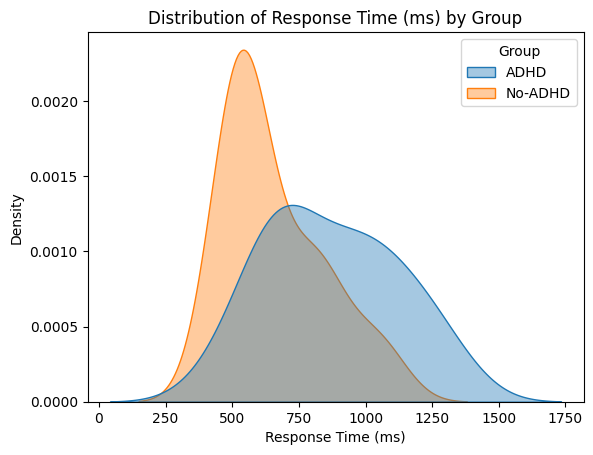

In [18]:
sns.kdeplot(
    data=combined_cpts,
    x="response_time_ms",
    hue="Group",
    fill=True,
    common_norm=False,
    alpha=0.4,
)

plt.title("Distribution of Response Time (ms) by Group")
plt.xlabel("Response Time (ms)")
plt.ylabel("Density")
plt.show()
